# Computer Vision

Input is a Picture of the Plate.
And the Data for the Robot
Output are Trapezoids of the Plate and to which working zones there are assigned to.

## Starting with extraction all the information from the picture


## Libaries
First, import all the needed libraries:

In [34]:
import cv2
import numpy as np
import array

import seidel as sd
from descartes import PolygonPatch
from shapely.geometry import  Polygon
import ComputerVisionHeinz as cvh


from matplotlib import pyplot as plt
%matplotlib inline

## Import Image
*   Import the Image
*   Check if it is a valid Image
*   Show the Image

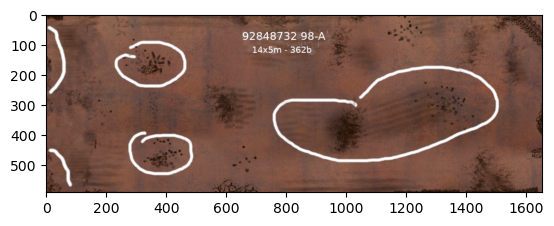

In [35]:
# Load the image
image = cv2.imread('panorama.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Failed to load the image.")
    exit()

# Show the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Filter the Picture for Contours
*   Delete everything that is not a Contour.
*   Check if the are of the contour is bigger then the Threshold area_size = 600.
*   Show the Image with the Contours.


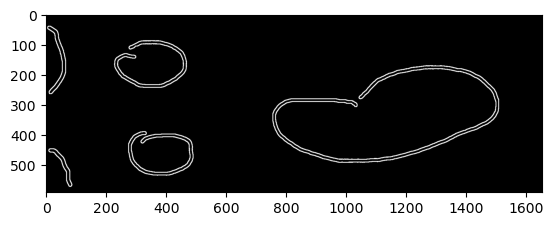

In [36]:
# Get the contours and a black Image with the contours drawn on it
grouped_contours, image_contours = cvh.get_grouped_contours(image, min_area=600)

# Show the countours on a black image
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.show()

### Make the Contours to closed Hulls

* Create a list of all the closed hulls
* Draw the hulls onto a black image

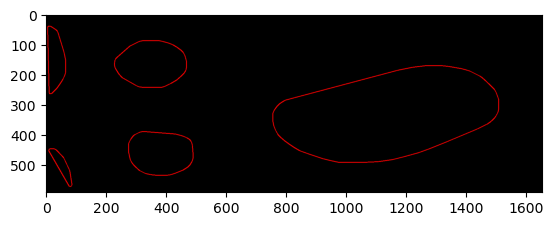

In [37]:
# Make the first hull closed
grouped_hulls, image_hulls = cvh.make_first_hull_closed(grouped_contours, image_contours)

# Show the hulls on a black image
plt.imshow(cv2.cvtColor(image_hulls, cv2.COLOR_BGR2RGB))
plt.show()

# Connect the Hulls to the Borders
* Check how close a Point of the Hull is to the Border by a threshold
* If the Point is close to the Border, connect the Point with the Border
* Draw the connected Hulls onto a black image

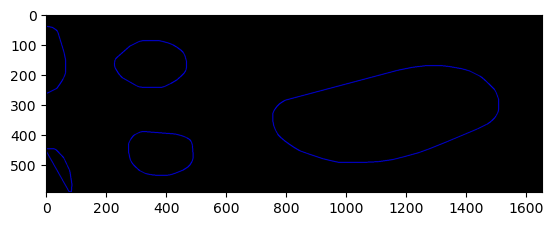

In [38]:
# Connect the hull to the border of the image
grouped_hulls_border, image_hulls_border = cvh.make_hull_connected_to_border(grouped_hulls, image_hulls)

# Show the hulls on a black image
plt.imshow(cv2.cvtColor(image_hulls_border, cv2.COLOR_BGR2RGB))
plt.show()

# Add the Corners to the Hulls
* If a Hull is connected to two Borders, add the Corners to the Hull

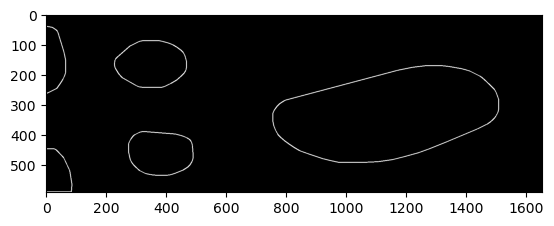

In [39]:
# Fill in the corners of the hulls
grouped_hulls_edges, image_hulls_corner = cvh.fill_corners(grouped_hulls_border, image_hulls_border)

# Show the hulls on a black image
plt.imshow(cv2.cvtColor(image_hulls_corner, cv2.COLOR_BGR2RGB))
plt.show()

# Extract the finished Polygones
* Extract the finished Polygones from the black image


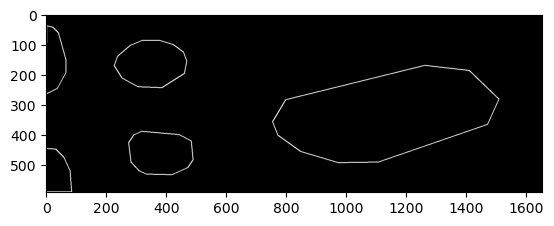

In [40]:
# Extract the finished hull
grouped_polynones_finished, image_finished_polynome = cvh.extract_finished_polynomes(image_hulls_corner)

# Show the hulls on a black image
plt.imshow(cv2.cvtColor(image_finished_polynome, cv2.COLOR_BGR2RGB))
plt.show()


# Make the Working Zones
* Make the working Zones
* return the size of the 4 working zones as well as 4 Cropped Images according to the working zones



In [41]:
#z0, z90, z180, z270 = make_working_zones(image_finished_hulls)

#For now its a mock up
h, w = image.shape[:2]
h, w = int(h/2), int(w/2)
z0 = [(0,0),(w,h)]
z90 = [(0,0),(-w,-h)]
z180 = [(0,0),(-w,h)]
z270 = [(0,0),(w,-h)]
working_zones = [z0, z90, z180, z270]


# Get the Hulls of each Working zone
* get all hulls in each working zone
* we use a greedy algorithm
* we will start with the Working Zone1
* if a Contour is in that zone it will get classified as this working zone and will be removed from the list of all contours
* more this area will be cropped from the image
* and replaced with a black mask

* returns 
    *   the hulls of each working zone
    *   the complete image with the hulls of each working zone in different colors
    *   lift of cropped images of each working zone with hulls







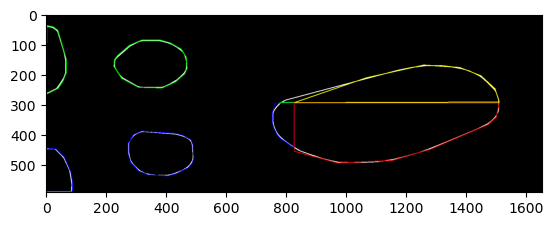

In [42]:
# Define the threshold for the detail of the polygone
threshold_detail_polygone = 0.005

# extract the hulls of each working zone
hull_finished_working_zones, img_finished_hull_working_zones, img_list_zones = \
    cvh.get_hulls(image_hulls_corner, working_zones, min_area = 10, threshold_detail_polygone=threshold_detail_polygone)

# Show the polygones depending on the working zones
plt.imshow(cv2.cvtColor(img_finished_hull_working_zones, cv2.COLOR_BGR2RGB))
plt.show()


# Make a dilation for each Polynome depending on the working zone
* makea dilation depending in which zone the polynome is
* returns 
    *   image with dilated polyones
    *   group polygones dilated
    *   cropped image with polynones dilated


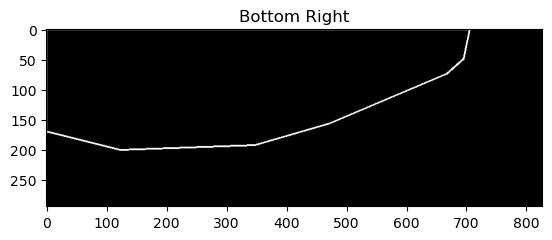

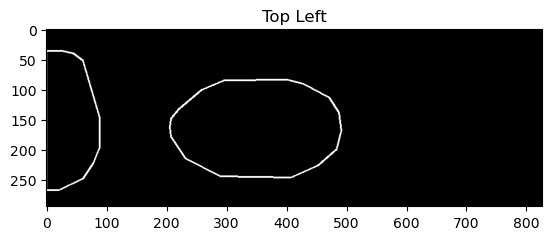

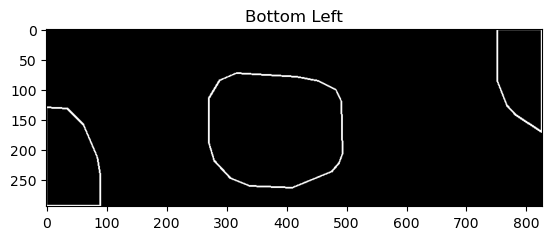

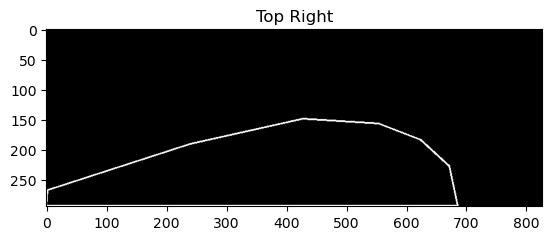

In [43]:
kernel = [(20,1),(20,1),(1,20),(1,20)]

# make the dilate of each polygone in each working zone
image_dilate_zones, grouped_polygones_dilate_zones, img_dilate_polygone_zones = \
    cvh.dilate_polygons(img_list_zones,kernel , threshold_detail_polygone=threshold_detail_polygone)


for i in range(len(img_dilate_polygone_zones)):
    if i == 0:
        plt.title("Bottom Right")
    elif i == 1:
        plt.title("Top Left")
    elif i == 2:
        plt.title("Bottom Left")
    elif i == 3:
        plt.title("Top Right")
    #plt.imshow(cv2.cvtColor(image_dilate_zones[i], cv2.COLOR_BGR2RGB))
    plt.imshow(cv2.cvtColor(img_dilate_polygone_zones[i], cv2.COLOR_BGR2RGB))
    plt.show()


# Make trapezoids for each poylnone in accordance with the working zone.

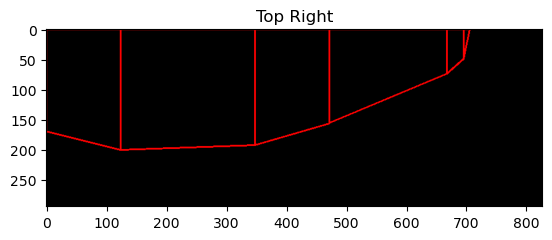

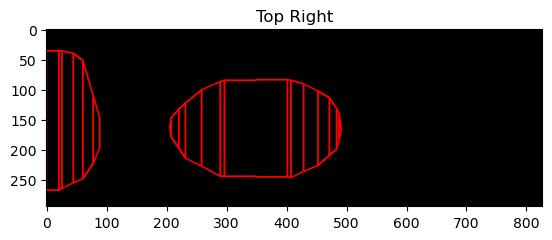

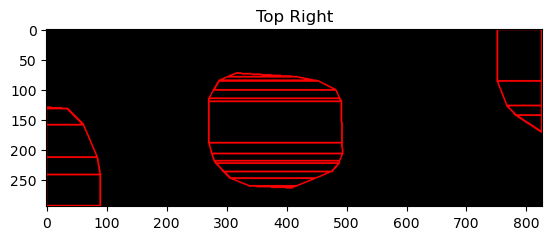

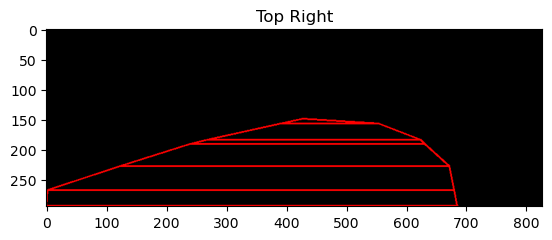

In [44]:
# make the trapezoids of each polygone in each working zone
polygones_zones = cvh.get_trapezoids(grouped_polygones_dilate_zones, img_dilate_polygone_zones, image)


# show the trapezoids
for polygone_groups, image_cropped_polygones in zip(polygones_zones,img_list_zones):
    image5 = np.zeros_like(image_cropped_polygones)
    for polygone in polygone_groups:
        for trap in polygone:
            # Draw the polygon on the image
            # Reshape the array to have shape (1, n, 2)
            pts = np.array([trap], np.int32)
            pts = pts.reshape((-1, 1, 2))
            cv2.polylines(image5, [pts], True, (0, 0, 255), thickness=2)
    if i == 0:
        plt.title("Bottom Right")
    elif i == 1:
        plt.title("Top Left")
    elif i == 2:
        plt.title("Bottom Left")
    elif i == 3:
        plt.title("Top Right")
    plt.imshow(cv2.cvtColor(image5, cv2.COLOR_BGR2RGB))
    plt.show()
